# Fourier Transfourm
 1. create harmonic signal
 2. apply fourier transform
 3. apply frequency domain scaling
 4. cut part of the signal
 5. apply fourier transform and notice frequency leakage


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib notebook

In [2]:
from lib.signalprocessingmd import fourierTransform
from lib.helpersmd import getRandomND,getMyRandom
from lib.signalprocessingmd import harm,spike,shift
from lib.signalprocessingmd import getScaledDomain,cutSignal

<IPython.core.display.Javascript object>


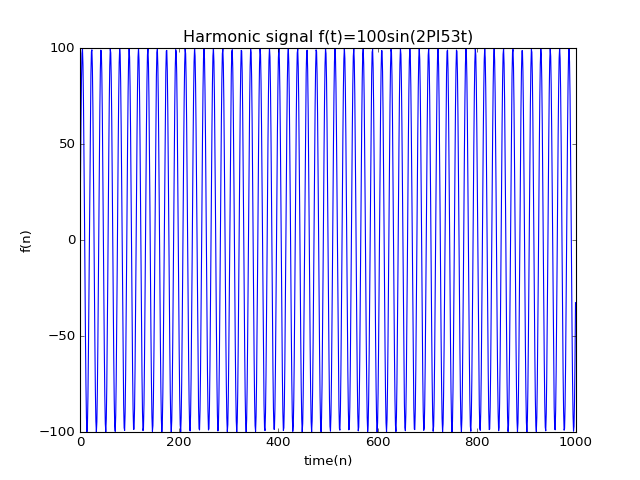

<IPython.core.display.Javascript object>


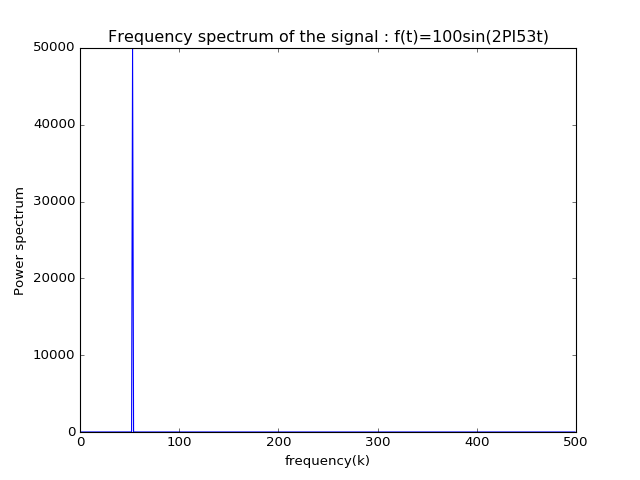

In [3]:
f0=53	  #signal frequency
A0=100    #amplitude
dt=0.001  #sampling time
fgr=1/(2.0*dt)   #sampling frequency

N=1000    # number of samples
N1=800   # first N1 sample will be kept after cutting the signal , the last N-N1 will be set to 0
T=1       # signal duration
# first : create harmonic signal
xk,desc=harm(A0,f0,dt,N)
# second : apply Fourier transform
_,Cn=fourierTransform(xk)
# third : domain scaling
f=getScaledDomain(dt,N)
# the first N/2 is enough to represent the spectrum
Cn=Cn[:N/2]
f=f[:N/2]

plt.figure(desc)
plt.title("Harmonic signal f(t)="+desc)
plt.plot(xk)
plt.xlabel("time(n)")
plt.ylabel("f(n)")
plt.savefig("figures/c05-0%d-%s.png"%(1,"Harmonic signal"))
plt.figure("Fourier transform")
plt.title("Frequency spectrum of the signal : f(t)="+desc)
plt.plot(Cn);
plt.xlabel("frequency(k)")
plt.ylabel("Power spectrum")
plt.savefig("figures/c05-0%d-%s.png"%(2,"Frequency spectrum"))
plt.show()

<IPython.core.display.Javascript object>


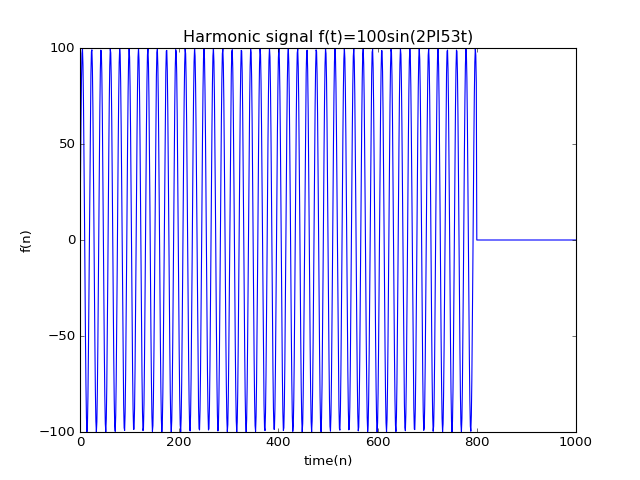

<IPython.core.display.Javascript object>


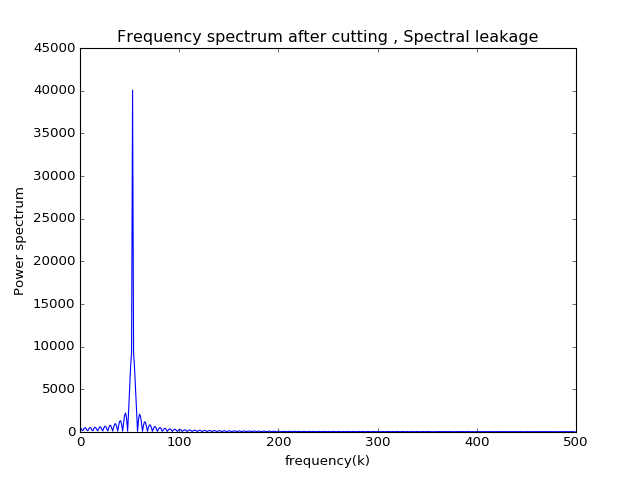

In [4]:
# Fourth : cut the signal tFokex# F,N)ep first N1 , and set the remains to 0
xkcut=cutSignal(xk,N1,N)
#print xkcut
# Apply fourier transform
_,Cn=fourierTransform(xkcut)
# domain scaling
f=getScaledDomain(dt,N)
# keep first N/2 frequencies
Cn=Cn[:N/2]

f=f[:N/2]
plt.figure(desc+" , after cutting the last %d samples"%(N-N1))
plt.title("Harmonic signal f(t)="+desc)
plt.plot(xkcut)
plt.xlabel("time(n)")
plt.ylabel("f(n)")
plt.savefig("figures/c05-0%d-%s.png"%(3,"harmonic signal after curring"))
plt.figure("Spectral Leakage")
plt.title("Frequency spectrum after cutting , Spectral leakage")
plt.plot(Cn);
plt.xlabel("frequency(k)")
plt.ylabel("Power spectrum")
plt.savefig("figures/c05-0%d-%s.png"%(4,"spectral leakage"))
plt.show()